In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

In [3]:
def basic_overview(df: pd.DataFrame):
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nFirst 5 Rows:\n", df.head())
    print("\nSummary Statistics:\n", df.describe(include="all"))

In [4]:
def check_missing(df: pd.DataFrame):
    missing = pd.DataFrame({
        "missing_count": df.isnull().sum(),
        "missing_percentage": df.isnull().mean() * 100
    }).sort_values("missing_percentage", ascending=False)

    print("\nMissing Values:\n", missing)
    return missing

In [5]:
def correlation_analysis(df: pd.DataFrame):
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()

    print("\nCorrelation Matrix:\n", corr)

    plt.figure(figsize=(8, 6))
    plt.imshow(corr)
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

In [6]:
def plot_distributions(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        plt.figure()
        plt.hist(df[col].dropna(), bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

In [7]:
def plot_boxplots(df: pd.DataFrame):
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        plt.figure()
        plt.boxplot(df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.ylabel(col)
        plt.show()

In [8]:
def categorical_summary(df: pd.DataFrame):
    cat_cols = df.select_dtypes(include=["object"]).columns

    for col in cat_cols:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())


In [11]:
file_path = "global_ads_performance_dataset.csv"
df = load_data(file_path)
df.head()

,date,platform,campaign_type,industry,country,impressions,clicks,CTR,CPC,ad_spend,conversions,CPA,revenue,ROAS
0,2024-01-21,Google Ads,Search,Fintech,UAE,59886,2113,0.0353,1.26,2662.38,159,16.74,4803.43,1.80
1,2024-01-22,TikTok Ads,Search,EdTech,UK,135608,5220,0.0385,1.18,6159.60,411,14.99,64126.68,10.41
2,2024-06-15,TikTok Ads,Video,Healthcare,USA,92313,5991,0.0649,0.85,5092.35,267,19.07,10489.07,2.06
3,2024-01-02,TikTok Ads,Shopping,SaaS,Germany,83953,5935,0.0707,1.32,7834.20,296,26.47,50505.07,6.45
4,2024-02-22,TikTok Ads,Search,Healthcare,UK,91807,4489,0.0489,1.93,8663.77,107,80.97,3369.53,0.39


In [10]:
basic_overview(df)

Shape: (1800, 14)

Data Types:
 date              object
platform          object
campaign_type     object
industry          object
country           object
impressions        int64
clicks             int64
CTR              float64
CPC              float64
ad_spend         float64
conversions        int64
CPA              float64
revenue          float64
ROAS             float64
dtype: object

First 5 Rows:
          date    platform campaign_type    industry  country  impressions  \
0  2024-01-21  Google Ads        Search     Fintech      UAE        59886   
1  2024-01-22  TikTok Ads        Search      EdTech       UK       135608   
2  2024-06-15  TikTok Ads         Video  Healthcare      USA        92313   
3  2024-01-02  TikTok Ads      Shopping        SaaS  Germany        83953   
4  2024-02-22  TikTok Ads        Search  Healthcare       UK        91807   

   clicks     CTR   CPC  ad_spend  conversions    CPA   revenue   ROAS  
0    2113  0.0353  1.26   2662.38          159  16.7

In [12]:
check_missing(df)


Missing Values:
                missing_count  missing_percentage
date                       0                 0.0
platform                   0                 0.0
campaign_type              0                 0.0
industry                   0                 0.0
country                    0                 0.0
impressions                0                 0.0
clicks                     0                 0.0
CTR                        0                 0.0
CPC                        0                 0.0
ad_spend                   0                 0.0
conversions                0                 0.0
CPA                        0                 0.0
revenue                    0                 0.0
ROAS                       0                 0.0


,missing_count,missing_percentage
date,0,0.0
platform,0,0.0
campaign_type,0,0.0
industry,0,0.0
country,0,0.0
impressions,0,0.0
clicks,0,0.0
CTR,0,0.0
CPC,0,0.0
ad_spend,0,0.0


In [13]:
categorical_summary(df)


Value Counts for date:
date
2024-12-30    13
2024-08-14    11
2024-02-17    11
2024-04-04    11
2024-04-05    11
              ..
2024-05-30     1
2024-03-31     1
2024-10-01     1
2024-06-12     1
2024-12-27     1
Name: count, Length: 360, dtype: int64

Value Counts for platform:
platform
Google Ads    720
Meta Ads      630
TikTok Ads    450
Name: count, dtype: int64

Value Counts for campaign_type:
campaign_type
Search      477
Video       456
Shopping    447
Display     420
Name: count, dtype: int64

Value Counts for industry:
industry
EdTech        372
SaaS          370
Fintech       361
E-commerce    349
Healthcare    348
Name: count, dtype: int64

Value Counts for country:
country
UK           266
USA          266
Canada       262
India        261
UAE          258
Germany      255
Australia    232
Name: count, dtype: int64



Correlation Matrix:
              impressions    clicks       CTR       CPC  ad_spend  conversions  \
impressions     1.000000  0.724216  0.008748  0.004348  0.575685     0.577128   
clicks          0.724216  1.000000  0.615648 -0.025817  0.727014     0.816107   
CTR             0.008748  0.615648  1.000000 -0.050581  0.398962     0.508082   
CPC             0.004348 -0.025817 -0.050581  1.000000  0.553490    -0.050090   
ad_spend        0.575685  0.727014  0.398962  0.553490  1.000000     0.556685   
conversions     0.577128  0.816107  0.508082 -0.050090  0.556685     1.000000   
CPA            -0.010673 -0.021935 -0.037372  0.585096  0.336351    -0.324662   
revenue         0.481937  0.676309  0.408322 -0.021574  0.480424     0.831082   
ROAS            0.030293  0.066232  0.071215 -0.505078 -0.255048     0.276061   

                  CPA   revenue      ROAS  
impressions -0.010673  0.481937  0.030293  
clicks      -0.021935  0.676309  0.066232  
CTR         -0.037372  0.408322  0.

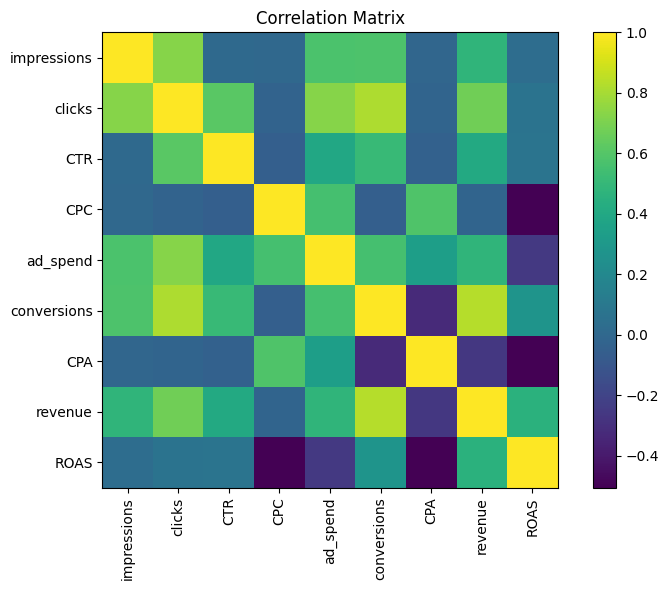

In [14]:
correlation_analysis(df)

In [ ]:
plot_distributions(df)

In [ ]:
plot_boxplots(df)